In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn.metrics as metrics

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import functools

In [3]:
KD_Overral = pd.read_parquet("./TOOLS_PREDICTION/DATA_KDA/KDA_PREDICTION/KDA_Overral.parquet")
KD_Seen    = pd.read_parquet("./TOOLS_PREDICTION/DATA_KDA/KDA_PREDICTION/KDA_Seen.parquet")
KD_Unseen  = pd.read_parquet("./TOOLS_PREDICTION/DATA_KDA/KDA_PREDICTION/KDA_Unseen.parquet")

In [4]:
epiTCR_Overral = pd.read_parquet("./TOOLS_PREDICTION/DATA_epiTCR/epiTCR_PREDICTION/epiTCR_Overral.parquet")
epiTCR_Seen    = pd.read_parquet("./TOOLS_PREDICTION/DATA_epiTCR/epiTCR_PREDICTION/epiTCR_Seen.parquet")
epiTCR_Unseen  = pd.read_parquet("./TOOLS_PREDICTION/DATA_epiTCR/epiTCR_PREDICTION/epiTCR_Unseen.parquet")

In [5]:
TEIM_Overral = pd.read_parquet("./TOOLS_PREDICTION/DATA_TEIM/TEIM_PREDICTION/TEIM_Overral.parquet")
TEIM_Seen    = pd.read_parquet("./TOOLS_PREDICTION/DATA_TEIM/TEIM_PREDICTION/TEIM_Seen.parquet")
TEIM_Unseen  = pd.read_parquet("./TOOLS_PREDICTION/DATA_TEIM/TEIM_PREDICTION/TEIM_Unseen.parquet")

In [6]:
TEInet_Overral = pd.read_parquet("./TOOLS_PREDICTION/DATA_TEINet/TEINet_PREDICTION/TEINet_Overral.parquet")
TEInet_Seen    = pd.read_parquet("./TOOLS_PREDICTION/DATA_TEINet/TEINet_PREDICTION/TEINet_Seen.parquet")
TEInet_Unseen  = pd.read_parquet("./TOOLS_PREDICTION/DATA_TEINet/TEINet_PREDICTION/TEINet_Unseen.parquet")

In [7]:
Bertrand_Overral = pd.read_parquet("../BERTrand/PREDICTION/BERTrand_PREDICTION_Universal_v3_Overral.parquet")
Bertrand_Seen    = pd.read_parquet("../BERTrand/PREDICTION/BERTrand_PREDICTION_Universal_v3_Seen.parquet")
Bertrand_Unseen  = pd.read_parquet("../BERTrand/PREDICTION/BERTrand_PREDICTION_Universal_v3_Unseen.parquet")

In [8]:
NetTCR_Overral = pd.read_parquet("./TOOLS_PREDICTION/DATA_NetTCR/NetTCR_PREDICTION/NetTCR_Overral.parquet")
NetTCR_Seen    = pd.read_parquet("./TOOLS_PREDICTION/DATA_NetTCR/NetTCR_PREDICTION/NetTCR_Seen.parquet")
NetTCR_Unseen  = pd.read_parquet("./TOOLS_PREDICTION/DATA_NetTCR/NetTCR_PREDICTION/NetTCR_Unseen.parquet")

In [9]:
Imrex_Overral = pd.read_parquet("../Imrex/PREDICTION/Imrex_PREDICTION_Universal_v3_Overral.parquet")
Imrex_Seen    = pd.read_parquet("../Imrex/PREDICTION/Imrex_PREDICTION_Universal_v3_Seen.parquet")
Imrex_Unseen  = pd.read_parquet("../Imrex/PREDICTION/Imrex_PREDICTION_Universal_v3_Unseen.parquet")

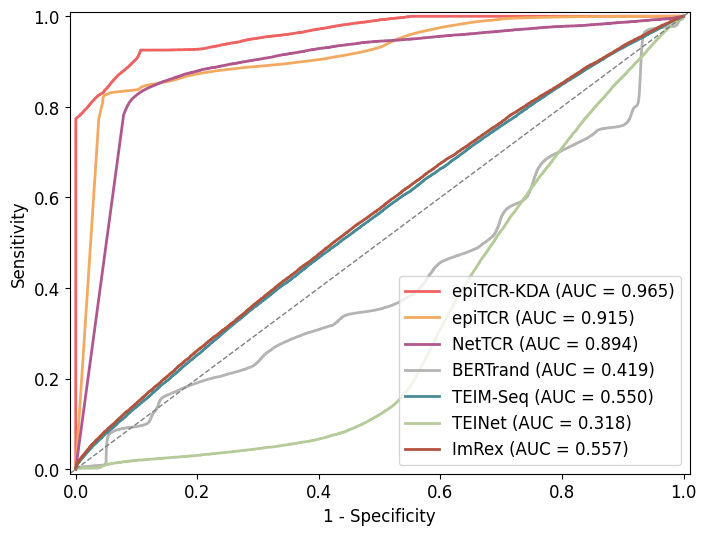

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Đọc dữ liệu từ hai DataFrame khác nhau
data_kd = KD_Overral.copy()
data_epitcr = epiTCR_Overral.copy()
data_teim = TEIM_Overral.copy()
data_bertrand = Bertrand_Overral.copy()
data_teinet = TEInet_Overral.copy()
data_nettcr = NetTCR_Overral.copy()
data_imrex = Imrex_Overral.copy()

fpr_kd, tpr_kd, thresholds_kd = roc_curve(data_kd['binder'], data_kd['proba_pred'])
roc_auc_kd = auc(fpr_kd, tpr_kd)

fpr_epitcr, tpr_epitcr, thresholds_epitcr = roc_curve(data_epitcr['binder'], data_epitcr['predict_proba'])
roc_auc_epitcr = auc(fpr_epitcr, tpr_epitcr)

fpr_nettcr, tpr_netctr, thresholds_nettcr = roc_curve(data_nettcr['binder'], data_nettcr['prediction'])
roc_auc_nettcr = auc(fpr_nettcr, tpr_netctr)

fpr_bertrand, tpr_bertrand, thresholds_bertrand = roc_curve(data_bertrand['binder'], data_bertrand['prediction'])
roc_auc_bertrand = auc(fpr_bertrand, tpr_bertrand)

fpr_teim, tpr_teim, thresholds_teim = roc_curve(data_teim['binder'], data_teim['binding'])
roc_auc_teim = auc(fpr_teim, tpr_teim)

fpr_teinet, tpr_teinet, thresholds_teinet = roc_curve(data_teinet['binder'], data_teinet['expit_prediction'])
roc_auc_teinet = auc(fpr_teinet, tpr_teinet)

fpr_imrex, tpr_imrex, thresholds_imrex = roc_curve(data_imrex['binder'], data_imrex['prediction_score'])
roc_auc_imrex = auc(fpr_imrex, tpr_imrex)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))

plt.plot(fpr_kd, tpr_kd, color='#EF6262', lw=2, label='epiTCR-KDA (AUC = {:.3f})'.format(roc_auc_kd))
plt.plot(fpr_epitcr, tpr_epitcr, color='#F3AA60', lw=2, label='epiTCR (AUC = {:.3f})'.format(roc_auc_epitcr))
plt.plot(fpr_nettcr, tpr_netctr, color='#B0578D', lw=2, label='NetTCR (AUC = {:.3f})'.format(roc_auc_nettcr))
plt.plot(fpr_bertrand, tpr_bertrand, color='#B4B4B3', lw=2, label='BERTrand (AUC = {:.3f})'.format(roc_auc_bertrand))
plt.plot(fpr_teim, tpr_teim, color='#468B97', lw=2, label='TEIM-Seq (AUC = {:.3f})'.format(roc_auc_teim))
plt.plot(fpr_teinet, tpr_teinet, color='#B5CB99', lw=2, label='TEINet (AUC = {:.3f})'.format(roc_auc_teinet))
plt.plot(fpr_imrex, tpr_imrex, color='#B2533E', lw=2, label='ImRex (AUC = {:.3f})'.format(roc_auc_imrex))

plt.plot([-0.01, 1.01], [-0.01, 1.01], color='gray', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# plt.title('Prediction on Overral epitopes')
plt.legend(loc="lower right")

plt.savefig("./plots/AUC_Overral.png", bbox_inches='tight', dpi=300)
plt.show()

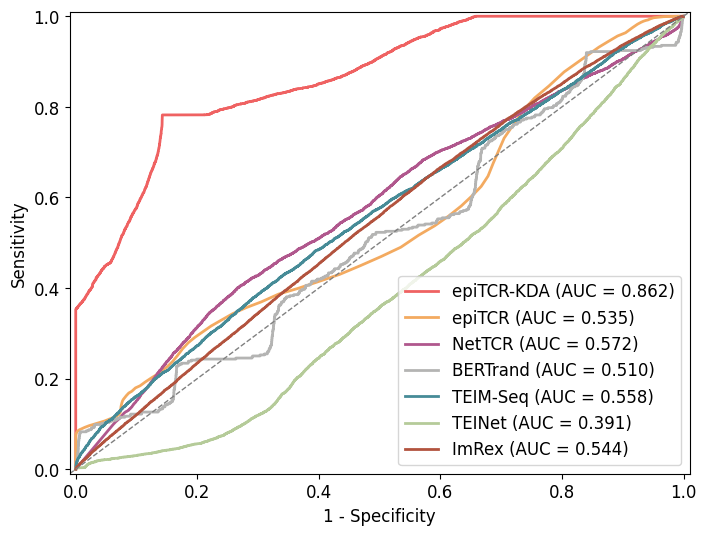

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

data_kd = KD_Unseen.copy()
data_epitcr = epiTCR_Unseen.copy()
data_teim = TEIM_Unseen.copy()
data_bertrand = Bertrand_Unseen.copy()
data_teinet = TEInet_Unseen.copy()
data_teinet = TEInet_Unseen.copy()
data_nettcr = NetTCR_Unseen.copy()
data_imrex = Imrex_Unseen.copy()


fpr_kd, tpr_kd, thresholds_kd = roc_curve(data_kd['binder'], data_kd['proba_pred'])
roc_auc_kd = auc(fpr_kd, tpr_kd)

fpr_epitcr, tpr_epitcr, thresholds_epitcr = roc_curve(data_epitcr['binder'], data_epitcr['predict_proba'])
roc_auc_epitcr = auc(fpr_epitcr, tpr_epitcr)

fpr_teim, tpr_teim, thresholds_teim = roc_curve(data_teim['binder'], data_teim['binding'])
roc_auc_teim = auc(fpr_teim, tpr_teim)

fpr_teinet, tpr_teinet, thresholds_teinet = roc_curve(data_teinet['binder'], data_teinet['expit_prediction'])
roc_auc_teinet = auc(fpr_teinet, tpr_teinet)

fpr_bertrand, tpr_bertrand, thresholds_bertrand = roc_curve(data_bertrand['binder'], data_bertrand['prediction'])
roc_auc_bertrand = auc(fpr_bertrand, tpr_bertrand)

fpr_nettcr, tpr_netctr, thresholds_nettcr = roc_curve(data_nettcr['binder'], data_nettcr['prediction'])
roc_auc_nettcr = auc(fpr_nettcr, tpr_netctr)

fpr_imrex, tpr_imrex, thresholds_imrex = roc_curve(data_imrex['binder'], data_imrex['prediction_score'])
roc_auc_imrex = auc(fpr_imrex, tpr_imrex)

# Vẽ ROC curve cho cả hai DataFrame
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

plt.plot(fpr_kd, tpr_kd, color='#EF6262', lw=2, label='epiTCR-KDA (AUC = {:.3f})'.format(roc_auc_kd))
plt.plot(fpr_epitcr, tpr_epitcr, color='#F3AA60', lw=2, label='epiTCR (AUC = {:.3f})'.format(roc_auc_epitcr))
plt.plot(fpr_nettcr, tpr_netctr, color='#B0578D', lw=2, label='NetTCR (AUC = {:.3f})'.format(roc_auc_nettcr))
plt.plot(fpr_bertrand, tpr_bertrand, color='#B4B4B3', lw=2, label='BERTrand (AUC = {:.3f})'.format(roc_auc_bertrand))
plt.plot(fpr_teim, tpr_teim, color='#468B97', lw=2, label='TEIM-Seq (AUC = {:.3f})'.format(roc_auc_teim))
plt.plot(fpr_teinet, tpr_teinet, color='#B5CB99', lw=2, label='TEINet (AUC = {:.3f})'.format(roc_auc_teinet))
plt.plot(fpr_imrex, tpr_imrex, color='#B2533E', lw=2, label='ImRex (AUC = {:.3f})'.format(roc_auc_imrex))

plt.plot([-0.01, 1.01], [-0.01, 1.01], color='gray', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc="lower right")

plt.savefig("./plots/AUC_Unseen.png", bbox_inches='tight', dpi=300)
plt.show()

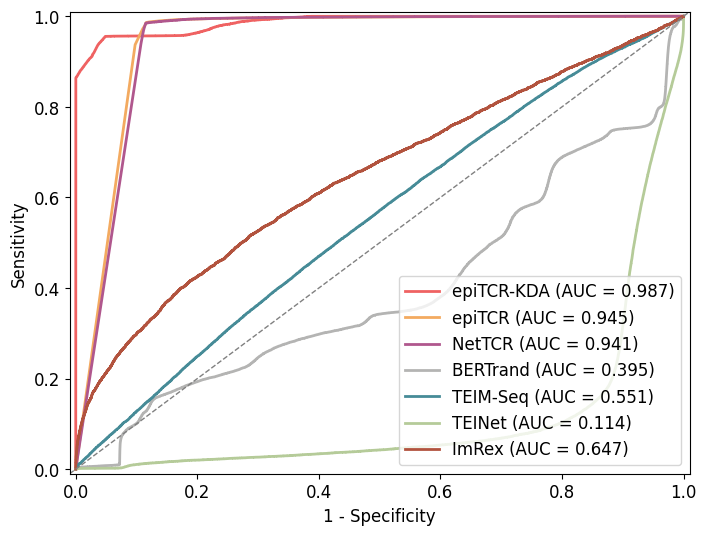

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Đọc dữ liệu từ hai DataFrame khác nhau
data_kd = KD_Seen.copy()
data_epitcr = epiTCR_Seen.copy()
data_teim = TEIM_Seen.copy()
data_bertrand = Bertrand_Seen.copy()
data_teinet = TEInet_Seen.copy()
data_teinet = TEInet_Seen.copy()
data_nettcr = NetTCR_Seen.copy()
data_imrex = Imrex_Seen.copy()

fpr_kd, tpr_kd, thresholds_kd = roc_curve(data_kd['binder'], data_kd['proba_pred'])
roc_auc_kd = auc(fpr_kd, tpr_kd)

fpr_epitcr, tpr_epitcr, thresholds_epitcr = roc_curve(data_epitcr['binder'], data_epitcr['predict_proba'])
roc_auc_epitcr = auc(fpr_epitcr, tpr_epitcr)

fpr_teim, tpr_teim, thresholds_teim = roc_curve(data_teim['binder'], data_teim['binding'])
roc_auc_teim = auc(fpr_teim, tpr_teim)

fpr_teinet, tpr_teinet, thresholds_teinet = roc_curve(data_teinet['binder'], data_teinet['expit_prediction'])
roc_auc_teinet = auc(fpr_teinet, tpr_teinet)

fpr_bertrand, tpr_bertrand, thresholds_bertrand = roc_curve(data_bertrand['binder'], data_bertrand['prediction'])
roc_auc_bertrand = auc(fpr_bertrand, tpr_bertrand)

fpr_nettcr, tpr_netctr, thresholds_nettcr = roc_curve(data_nettcr['binder'], data_nettcr['prediction'])
roc_auc_nettcr = auc(fpr_nettcr, tpr_netctr)

fpr_imrex, tpr_imrex, thresholds_imrex = roc_curve(data_imrex['binder'], data_imrex['prediction_score'])
roc_auc_imrex = auc(fpr_imrex, tpr_imrex)

# Vẽ ROC curve cho cả hai DataFrame
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

plt.plot(fpr_kd, tpr_kd, color='#EF6262', lw=2, label='epiTCR-KDA (AUC = {:.3f})'.format(roc_auc_kd))
plt.plot(fpr_epitcr, tpr_epitcr, color='#F3AA60', lw=2, label='epiTCR (AUC = {:.3f})'.format(roc_auc_epitcr))
plt.plot(fpr_nettcr, tpr_netctr, color='#B0578D', lw=2, label='NetTCR (AUC = {:.3f})'.format(roc_auc_nettcr))
plt.plot(fpr_bertrand, tpr_bertrand, color='#B4B4B3', lw=2, label='BERTrand (AUC = {:.3f})'.format(roc_auc_bertrand))
plt.plot(fpr_teim, tpr_teim, color='#468B97', lw=2, label='TEIM-Seq (AUC = {:.3f})'.format(roc_auc_teim))
plt.plot(fpr_teinet, tpr_teinet, color='#B5CB99', lw=2, label='TEINet (AUC = {:.3f})'.format(roc_auc_teinet))
plt.plot(fpr_imrex, tpr_imrex, color='#B2533E', lw=2, label='ImRex (AUC = {:.3f})'.format(roc_auc_imrex))

plt.plot([-0.01, 1.01], [-0.01, 1.01], color='gray', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# plt.title('Prediction on Seen epitopes')
plt.legend(loc="lower right")

plt.savefig("./plots/AUC_Seen.png", bbox_inches='tight', dpi=300)
# plt.savefig("./plots/AUC_Seen.pdf", bbox_inches='tight', dpi=300)
plt.show()

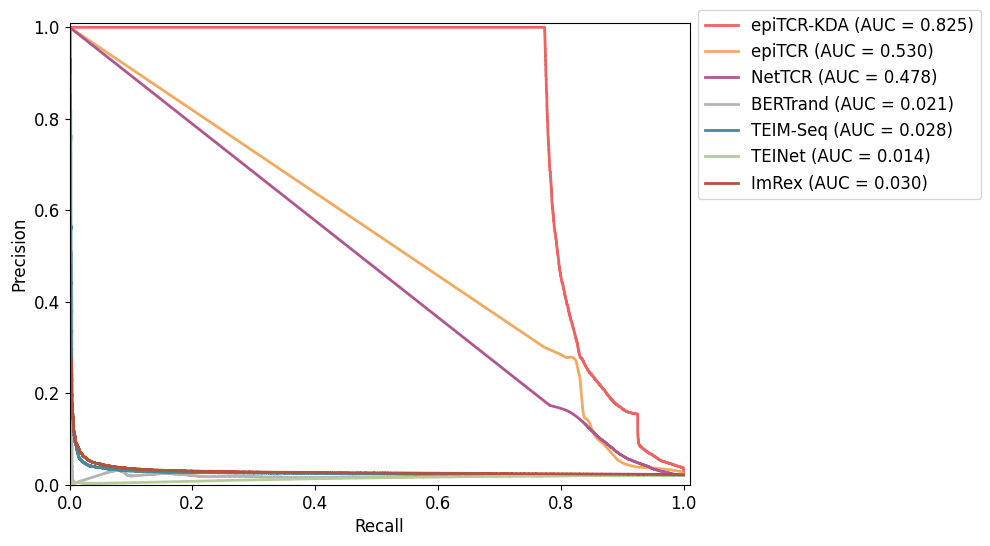

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

data_kd = KD_Overral.copy()
data_epitcr = epiTCR_Overral.copy()
data_teim = TEIM_Overral.copy()
data_bertrand = Bertrand_Overral.copy()
data_teinet = TEInet_Overral.copy()
data_nettcr = NetTCR_Overral.copy()
data_imrex = Imrex_Overral.copy()

# Calculate precision-recall for each model
precision_kd, recall_kd, _ = precision_recall_curve(data_kd['binder'], data_kd['proba_pred'])
auc_kd = auc(recall_kd, precision_kd)

precision_epitcr, recall_epitcr, _ = precision_recall_curve(data_epitcr['binder'], data_epitcr['predict_proba'])
auc_epitcr = auc(recall_epitcr, precision_epitcr)

precision_teim, recall_teim, _ = precision_recall_curve(data_teim['binder'], data_teim['binding'])
auc_teim = auc(recall_teim, precision_teim)

precision_teinet, recall_teinet, _ = precision_recall_curve(data_teinet['binder'], data_teinet['expit_prediction'])
auc_teinet = auc(recall_teinet, precision_teinet)

precision_bertrand, recall_bertrand, _ = precision_recall_curve(data_bertrand['binder'], data_bertrand['prediction'])
auc_bertrand = auc(recall_bertrand, precision_bertrand)

precision_nettcr, recall_nettcr, _ = precision_recall_curve(data_nettcr['binder'], data_nettcr['prediction'])
auc_nettcr = auc(recall_nettcr, precision_nettcr)

precision_imrex, recall_imrex, _ = precision_recall_curve(data_imrex['binder'], data_imrex['prediction_score'])
auc_imrex = auc(recall_imrex, precision_imrex)

# Plot Precision-Recall Curve for each model
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

plt.plot(recall_kd, precision_kd, color='#EF6262', lw=2, label='epiTCR-KDA (AUC = {:.3f})'.format(auc_kd))
plt.plot(recall_epitcr, precision_epitcr, color='#F3AA60', lw=2, label='epiTCR (AUC = {:.3f})'.format(auc_epitcr))
plt.plot(recall_nettcr, precision_nettcr, color='#B0578D', lw=2, label='NetTCR (AUC = {:.3f})'.format(auc_nettcr))
plt.plot(recall_bertrand, precision_bertrand, color='#B4B4B3', lw=2, label='BERTrand (AUC = {:.3f})'.format(auc_bertrand))
plt.plot(recall_teim, precision_teim, color='#468B97', lw=2, label='TEIM-Seq (AUC = {:.3f})'.format(auc_teim))
plt.plot(recall_teinet, precision_teinet, color='#B5CB99', lw=2, label='TEINet (AUC = {:.3f})'.format(auc_teinet))
plt.plot(recall_imrex, precision_imrex, color='#B2533E', lw=2, label='ImRex (AUC = {:.3f})'.format(auc_imrex))

plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left", bbox_to_anchor=(1,0.60))

plt.savefig("./plots/PR_Overall.png", bbox_inches='tight', dpi=300)
plt.show()
# 

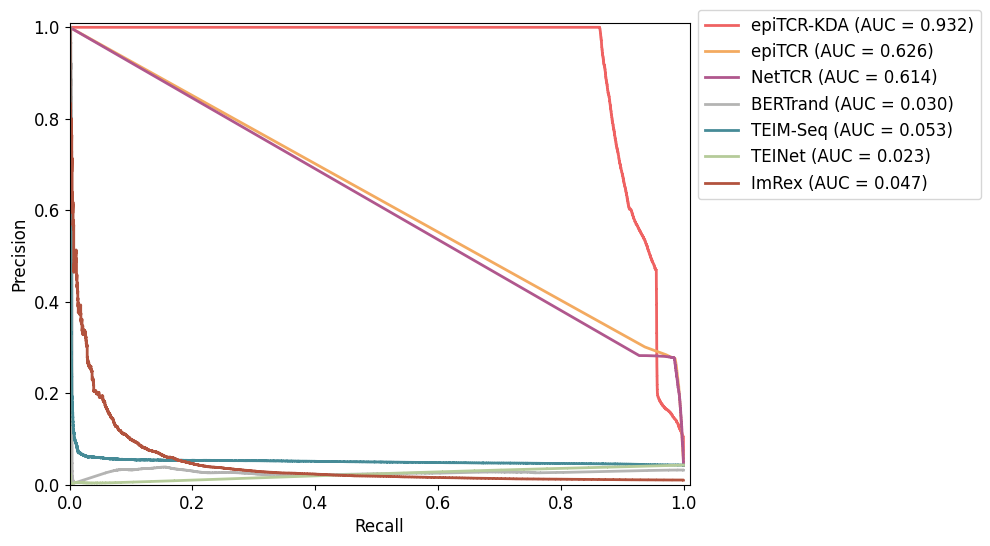

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

data_kd = KD_Seen.copy()
data_epitcr = epiTCR_Seen.copy()
data_teim = TEIM_Seen.copy()
data_bertrand = Bertrand_Seen.copy()
data_teinet = TEInet_Seen.copy()
data_nettcr = NetTCR_Seen.copy()
data_imrex = Imrex_Seen.copy()

# Calculate precision-recall for each model
precision_kd, recall_kd, _ = precision_recall_curve(data_kd['binder'], data_kd['proba_pred'])
auc_kd = auc(recall_kd, precision_kd)

precision_epitcr, recall_epitcr, _ = precision_recall_curve(data_epitcr['binder'], data_epitcr['predict_proba'])
auc_epitcr = auc(recall_epitcr, precision_epitcr)

precision_teim, recall_teim, _ = precision_recall_curve(data_teim['binder'], data_teim['binding'])
auc_teim = auc(recall_teim, precision_teim)

precision_teinet, recall_teinet, _ = precision_recall_curve(data_teinet['binder'], data_teinet['expit_prediction'])
auc_teinet = auc(recall_teinet, precision_teinet)

precision_bertrand, recall_bertrand, _ = precision_recall_curve(data_bertrand['binder'], data_bertrand['prediction'])
auc_bertrand = auc(recall_bertrand, precision_bertrand)

precision_nettcr, recall_nettcr, _ = precision_recall_curve(data_nettcr['binder'], data_nettcr['prediction'])
auc_nettcr = auc(recall_nettcr, precision_nettcr)

precision_imrex, recall_imrex, _ = precision_recall_curve(data_imrex['binder'], data_imrex['prediction_score'])
auc_imrex = auc(recall_imrex, precision_imrex)

# Plot Precision-Recall Curve for each model
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

plt.plot(recall_kd, precision_kd, color='#EF6262', lw=2, label='epiTCR-KDA (AUC = {:.3f})'.format(auc_kd))
plt.plot(recall_epitcr, precision_epitcr, color='#F3AA60', lw=2, label='epiTCR (AUC = {:.3f})'.format(auc_epitcr))
plt.plot(recall_nettcr, precision_nettcr, color='#B0578D', lw=2, label='NetTCR (AUC = {:.3f})'.format(auc_nettcr))
plt.plot(recall_bertrand, precision_bertrand, color='#B4B4B3', lw=2, label='BERTrand (AUC = {:.3f})'.format(auc_bertrand))
plt.plot(recall_teim, precision_teim, color='#468B97', lw=2, label='TEIM-Seq (AUC = {:.3f})'.format(auc_teim))
plt.plot(recall_teinet, precision_teinet, color='#B5CB99', lw=2, label='TEINet (AUC = {:.3f})'.format(auc_teinet))
plt.plot(recall_imrex, precision_imrex, color='#B2533E', lw=2, label='ImRex (AUC = {:.3f})'.format(auc_imrex))

plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left", bbox_to_anchor=(1,0.60))

plt.savefig("./plots/PR_Seen.png", bbox_inches='tight', dpi=300)
plt.show()


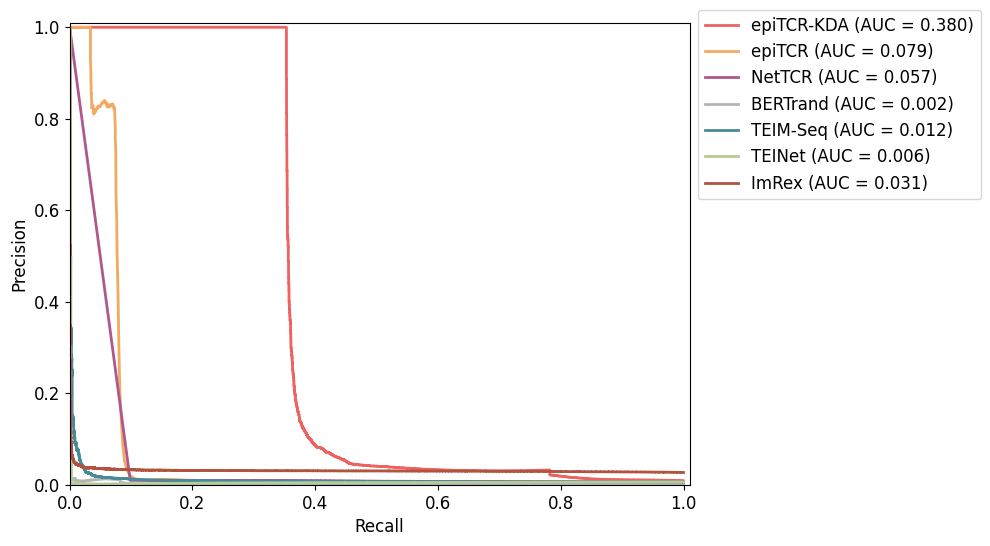

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

data_kd = KD_Unseen.copy()
data_epitcr = epiTCR_Unseen.copy()
data_teim = TEIM_Unseen.copy()
data_bertrand = Bertrand_Unseen.copy()
data_teinet = TEInet_Unseen.copy()
data_nettcr = NetTCR_Unseen.copy()
data_imrex = Imrex_Unseen.copy()

# Calculate precision-recall for each model
precision_kd, recall_kd, _ = precision_recall_curve(data_kd['binder'], data_kd['proba_pred'])
auc_kd = auc(recall_kd, precision_kd)

precision_epitcr, recall_epitcr, _ = precision_recall_curve(data_epitcr['binder'], data_epitcr['predict_proba'])
auc_epitcr = auc(recall_epitcr, precision_epitcr)

precision_teim, recall_teim, _ = precision_recall_curve(data_teim['binder'], data_teim['binding'])
auc_teim = auc(recall_teim, precision_teim)

precision_teinet, recall_teinet, _ = precision_recall_curve(data_teinet['binder'], data_teinet['expit_prediction'])
auc_teinet = auc(recall_teinet, precision_teinet)

precision_bertrand, recall_bertrand, _ = precision_recall_curve(data_bertrand['binder'], data_bertrand['prediction'])
auc_bertrand = auc(recall_bertrand, precision_bertrand)

precision_nettcr, recall_nettcr, _ = precision_recall_curve(data_nettcr['binder'], data_nettcr['prediction'])
auc_nettcr = auc(recall_nettcr, precision_nettcr)

precision_imrex, recall_imrex, _ = precision_recall_curve(data_imrex['binder'], data_imrex['prediction_score'])
auc_imrex = auc(recall_imrex, precision_imrex)

# Plot Precision-Recall Curve for each model
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

plt.plot(recall_kd, precision_kd, color='#EF6262', lw=2, label='epiTCR-KDA (AUC = {:.3f})'.format(auc_kd))
plt.plot(recall_epitcr, precision_epitcr, color='#F3AA60', lw=2, label='epiTCR (AUC = {:.3f})'.format(auc_epitcr))
plt.plot(recall_nettcr, precision_nettcr, color='#B0578D', lw=2, label='NetTCR (AUC = {:.3f})'.format(auc_nettcr))
plt.plot(recall_bertrand, precision_bertrand, color='#B4B4B3', lw=2, label='BERTrand (AUC = {:.3f})'.format(auc_bertrand))
plt.plot(recall_teim, precision_teim, color='#468B97', lw=2, label='TEIM-Seq (AUC = {:.3f})'.format(auc_teim))
plt.plot(recall_teinet, precision_teinet, color='#B5CB99', lw=2, label='TEINet (AUC = {:.3f})'.format(auc_teinet))
plt.plot(recall_imrex, precision_imrex, color='#B2533E', lw=2, label='ImRex (AUC = {:.3f})'.format(auc_imrex))

plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left", bbox_to_anchor=(1,0.60))

plt.savefig("./plots/PR_UnSeen.png", bbox_inches='tight', dpi=300)
plt.show()
# 

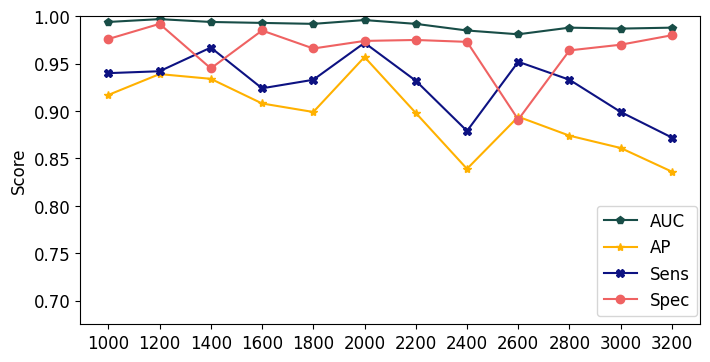

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn

# groups =  [1000,   1200,  1400,  1600,  1800,  2000,  2200,  2400,  2600,  2800,  3000,  3200]
# AUCs   =  [0.963, 0.969, 0.965, 0.965, 0.962, 0.965, 0.960, 0.950, 0.969, 0.948, 0.928, 0.950]
# mAPs   =  [0.994, 0.989, 0.992, 0.977, 0.984, 0.987, 0.980, 0.940, 0.975, 0.954, 0.930, 0.943]
# Sens   =  [0.821, 0.889, 0.841, 0.904, 0.866, 0.862, 0.817, 0.915, 0.832, 0.790, 0.793, 0.911]
# Spec   =  [0.821, 0.889, 0.841, 0.904, 0.866, 0.862, 0.817, 0.915, 0.832, 0.790, 0.793, 0.911]

# groups =  [1000,   1200,  1400,  1600,  1800,  2000,  2200,  2400,  2600,  2800,  3000,  3200]
# AUCs   =  [0.996, 0.997, 0.994, 0.993, 0.992, 0.994, 0.992, 0.985, 0.981, 0.988, 0.987, 0.988]
# mAPs   =  [0.957, 0.939, 0.934, 0.908, 0.899, 0.917, 0.898, 0.839, 0.894, 0.874, 0.861, 0.836]
# Sens   =  [0.972, 0.942, 0.967, 0.924, 0.933, 0.940, 0.932, 0.879, 0.952, 0.933, 0.899, 0.872]
# Spec   =  [0.974, 0.992, 0.945, 0.985, 0.966, 0.976, 0.975, 0.973, 0.891, 0.964, 0.970, 0.980]

groups =  [1000,   1200,  1400,  1600,  1800,  2000,  2200,  2400,  2600,  2800,  3000,  3200]
AUCs   =  [0.994, 0.997, 0.994, 0.993, 0.992, 0.996, 0.992, 0.985, 0.981, 0.988, 0.987, 0.988]
mAPs   =  [0.917, 0.939, 0.934, 0.908, 0.899, 0.957, 0.898, 0.839, 0.894, 0.874, 0.861, 0.836]
Sens   =  [0.940, 0.942, 0.967, 0.924, 0.933, 0.972, 0.932, 0.879, 0.952, 0.933, 0.899, 0.872]
Spec   =  [0.976, 0.992, 0.945, 0.985, 0.966, 0.974, 0.975, 0.973, 0.891, 0.964, 0.970, 0.980]



# Chia dữ liệu thành các nhóm
n = 12  # Số group
x = np.arange(n) * 1.3

# Màu sắc và marker tùy chỉnh cho từng đường
colors = ['#184D47', '#FFB100', '#0D1282', '#EF6262']
markers = ['p', '*', 'X', 'o']

# Vẽ biểu đồ đường
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, AUCs, label='AUC', color=colors[0], marker=markers[0])
ax.plot(x, mAPs, label='AP', color=colors[1], marker=markers[1])
ax.plot(x, Sens, label='Sens', color=colors[2], marker=markers[2])
ax.plot(x, Spec, label='Spec', color=colors[3], marker=markers[3])

plt.rcParams.update({'font.size': 12})

# ax.set_xlabel('Top epitopes in the training set', fontsize=12)
ax.set_ylabel('Score')
ax.set_xticks(x)
# Đặt nhãn trục x làm tròn 2 chữ số
ax.set_xticklabels([f'{int(round(group))}' for group in groups])

ax.set_ylim(0.675, 1)

# Đặt huy hiệu ở phía ngoài biểu đồ
ax.legend(loc='lower left', bbox_to_anchor=(0.82,0.0))

plt.savefig("./plots/plot_toppeps.png", bbox_inches='tight', dpi=300)

plt.show()


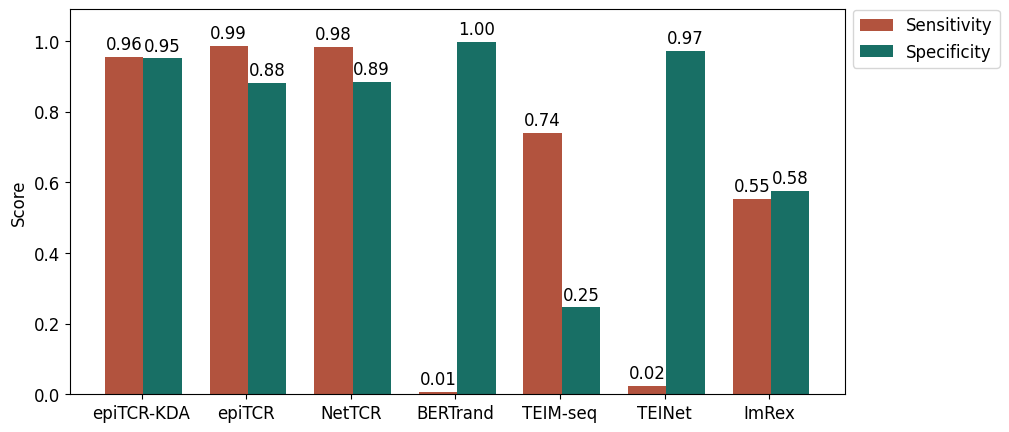

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn
groups  = ['epiTCR-KDA', 'epiTCR', 'NetTCR', 'BERTrand', 'TEIM-seq', 'TEINet', 'ImRex']
# sens    = [0.933, 0.358, 0.416, 0.006, 0.739, 0.003, 0.552]
# spec    = [0.892, 0.937, 0.940, 0.997, 0.246, 0.971, 0.576]

sens    = [0.956, 0.987, 0.984, 0.006, 0.739, 0.023, 0.552]
spec    = [0.951, 0.881, 0.885, 0.997, 0.246, 0.971, 0.576]

# sens    = [0.83, 0.36, 0.06, 0.79, 0.78, 0.89, 0.47]
# spec    = [0.90, 0.94, 1.00, 0.23, 0.25, 0.37, 0.58]

# Chia dữ liệu thành các nhóm
n = 7  # Số group
width = 0.55  # Điều chỉnh kích thước của mỗi cột (giảm kích thước)
x = np.arange(n) * 1.5  # Điều chỉnh khoảng cách giữa các cột (tăng khoảng cách)

# Màu sắc tùy chỉnh cho từng cột
colors = ['#B2533E', '#186F65', '#78D6C6']

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 5))  # Điều chỉnh kích thước 10x5 inches
fig.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots
ax.bar(x - width, sens, width, label='Sensitivity', color=colors[0])
ax.bar(x, spec, width, label='Specificity', color=colors[1])

# Cài đặt giới hạn trục y từ 0 đến 1
ax.set_ylim(0, 1.09)

ax.set_ylabel('Score')
ax.set_xticks(x-0.3)
ax.set_xticklabels(groups)
plt.rcParams.update({'font.size': 12})

# Đặt huy hiệu ở phía ngoài biểu đồ
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
# ax.legend(loc='upper left', bbox_to_anchor=(0.82,1.0))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02))


# Thêm giá trị lên các cột với làm tròn 2 chữ số thập phân
for i in range(n):
    ax.text(x[i] - width, sens[i] + 0.01, f'{sens[i]:.2f}', ha='center', va='bottom')
    ax.text(x[i], spec[i] + 0.01, f'{spec[i]:.2f}', ha='center', va='bottom')
    
plt.savefig("./plots/seen_sens_spec.png", bbox_inches='tight', dpi=300)

plt.show()


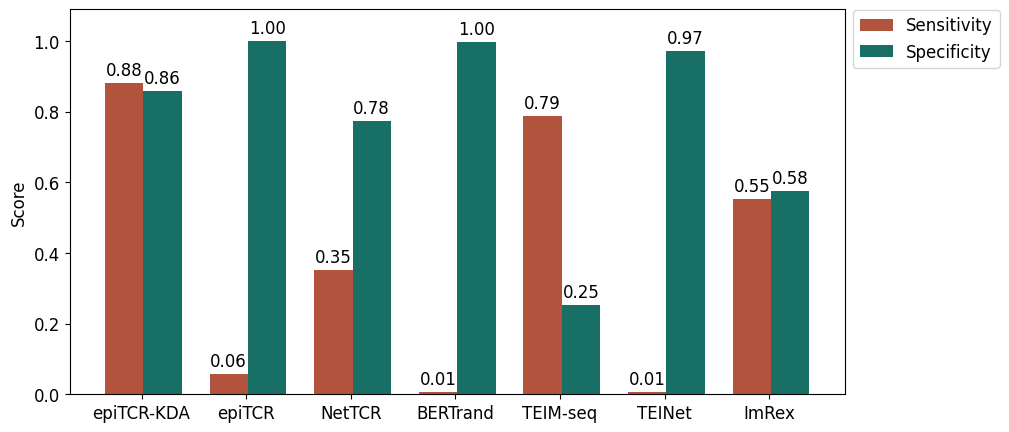

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn
groups  = ['epiTCR-KDA', 'epiTCR', 'NetTCR', 'BERTrand', 'TEIM-seq', 'TEINet', 'ImRex']
# sens    = [0.933, 0.358, 0.416, 0.006, 0.739, 0.003, 0.552]
# spec    = [0.892, 0.937, 0.940, 0.997, 0.246, 0.971, 0.576]

# sens    = [0.95, 0.80, 0.88, 0.71, 0.80, 0.60, 0.62]
# spec    = [0.88, 0.99, 1.00, 0.16, 0.26, 0.34, 0.59]

sens    = [0.882, 0.058, 0.351, 0.006, 0.789, 0.006, 0.552]
spec    = [0.858, 1.000, 0.775, 0.997, 0.253, 0.971, 0.576]

# Chia dữ liệu thành các nhóm
n = 7  # Số group
width = 0.55  # Điều chỉnh kích thước của mỗi cột (giảm kích thước)
x = np.arange(n) * 1.5  # Điều chỉnh khoảng cách giữa các cột (tăng khoảng cách)

# Màu sắc tùy chỉnh cho từng cột
colors = ['#B2533E', '#186F65', '#78D6C6']

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 5))  # Điều chỉnh kích thước 10x5 inches
fig.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots
ax.bar(x - width, sens, width, label='Sensitivity', color=colors[0])
ax.bar(x, spec, width, label='Specificity', color=colors[1])

# Cài đặt giới hạn trục y từ 0 đến 1
ax.set_ylim(0, 1.09)

ax.set_ylabel('Score')
ax.set_xticks(x-0.3)
ax.set_xticklabels(groups)
plt.rcParams.update({'font.size': 12})
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02))


# Đặt huy hiệu ở phía ngoài biểu đồ
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
# ax.legend(loc='upper left', bbox_to_anchor=(0.82,1.0))


# Thêm giá trị lên các cột với làm tròn 2 chữ số thập phân
for i in range(n):
    ax.text(x[i] - width, sens[i] + 0.01, f'{sens[i]:.2f}', ha='center', va='bottom')
    ax.text(x[i], spec[i] + 0.01, f'{spec[i]:.2f}', ha='center', va='bottom')
    
plt.savefig("./plots/unseen_sens_spec.png", bbox_inches='tight', dpi=300)

plt.show()


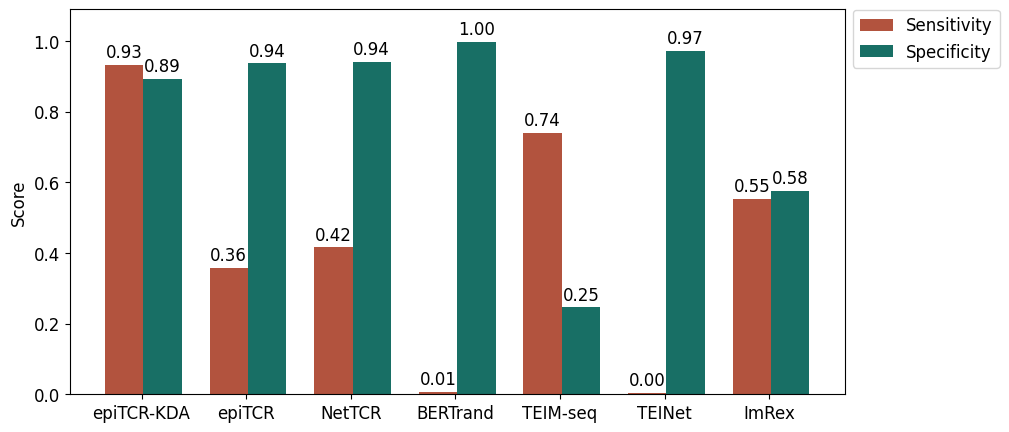

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn
groups  = ['epiTCR-KDA', 'epiTCR', 'NetTCR', 'BERTrand', 'TEIM-seq', 'TEINet', 'ImRex']
sens    = [0.933, 0.358, 0.416, 0.006, 0.739, 0.003, 0.552]
spec    = [0.892, 0.937, 0.940, 0.997, 0.246, 0.971, 0.576]

# sens    = [0.95, 0.80, 0.88, 0.71, 0.80, 0.60, 0.62]
# spec    = [0.88, 0.99, 1.00, 0.16, 0.26, 0.34, 0.59]

# sens    = [0.882, 0.058, 0.351, 0.006, 0.789, 0.006, 0.552]
# spec    = [0.858, 1.000, 0.775, 0.997, 0.253, 0.971, 0.576]

# Chia dữ liệu thành các nhóm
n = 7  # Số group
width = 0.55  # Điều chỉnh kích thước của mỗi cột (giảm kích thước)
x = np.arange(n) * 1.5  # Điều chỉnh khoảng cách giữa các cột (tăng khoảng cách)

# Màu sắc tùy chỉnh cho từng cột
colors = ['#B2533E', '#186F65', '#78D6C6']

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 5))  # Điều chỉnh kích thước 10x5 inches
fig.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots
ax.bar(x - width, sens, width, label='Sensitivity', color=colors[0])
ax.bar(x, spec, width, label='Specificity', color=colors[1])

# Cài đặt giới hạn trục y từ 0 đến 1
ax.set_ylim(0, 1.09)

ax.set_ylabel('Score')
ax.set_xticks(x-0.3)
ax.set_xticklabels(groups)
plt.rcParams.update({'font.size': 12})
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02))


# Đặt huy hiệu ở phía ngoài biểu đồ
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02))
# ax.legend(loc='upper left', bbox_to_anchor=(0.82,1.0))


# Thêm giá trị lên các cột với làm tròn 2 chữ số thập phân
for i in range(n):
    ax.text(x[i] - width, sens[i] + 0.01, f'{sens[i]:.2f}', ha='center', va='bottom')
    ax.text(x[i], spec[i] + 0.01, f'{spec[i]:.2f}', ha='center', va='bottom')
    
plt.savefig("./plots/overall_sens_spec.png", bbox_inches='tight', dpi=300)

plt.show()


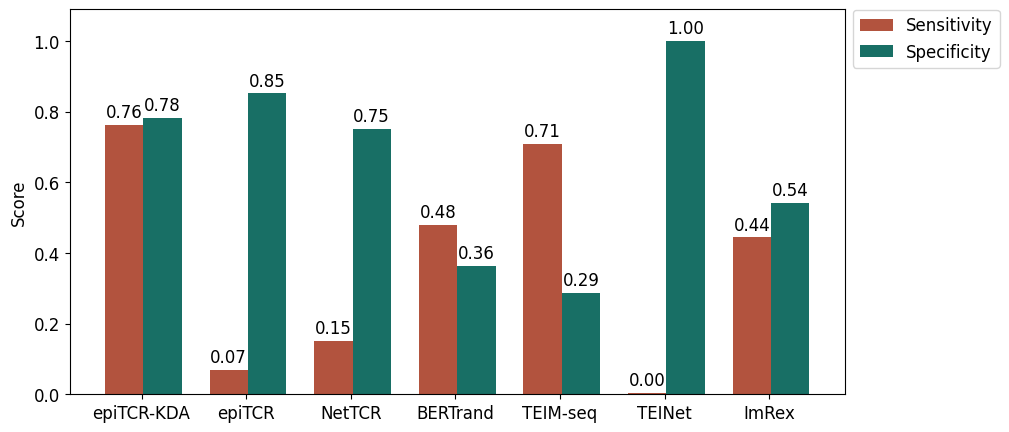

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn
groups  = ['epiTCR-KDA', 'epiTCR', 'NetTCR', 'BERTrand', 'TEIM-seq', 'TEINet', 'ImRex']
# sens    = [0.933, 0.358, 0.416, 0.006, 0.739, 0.003, 0.552]
# spec    = [0.892, 0.937, 0.940, 0.997, 0.246, 0.971, 0.576]

# sens    = [0.95, 0.80, 0.88, 0.71, 0.80, 0.60, 0.62]
# spec    = [0.88, 0.99, 1.00, 0.16, 0.26, 0.34, 0.59]

# sens    = [0.882, 0.058, 0.351, 0.006, 0.789, 0.006, 0.552]
# spec    = [0.858, 1.000, 0.775, 0.997, 0.253, 0.971, 0.576]

sens    = [0.762, 0.070, 0.152, 0.479, 0.708, 0.004, 0.444]
spec    = [0.783, 0.852, 0.751, 0.363, 0.286, 1.000, 0.541]


# Chia dữ liệu thành các nhóm
n = 7  # Số group
width = 0.55  # Điều chỉnh kích thước của mỗi cột (giảm kích thước)
x = np.arange(n) * 1.5  # Điều chỉnh khoảng cách giữa các cột (tăng khoảng cách)

# Màu sắc tùy chỉnh cho từng cột
colors = ['#B2533E', '#186F65', '#78D6C6']

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 5))  # Điều chỉnh kích thước 10x5 inches
fig.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots
ax.bar(x - width, sens, width, label='Sensitivity', color=colors[0])
ax.bar(x, spec, width, label='Specificity', color=colors[1])

# Cài đặt giới hạn trục y từ 0 đến 1
ax.set_ylim(0, 1.09)

ax.set_ylabel('Score')
ax.set_xticks(x-0.3)
ax.set_xticklabels(groups)
plt.rcParams.update({'font.size': 12})
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.02))

# Thêm giá trị lên các cột với làm tròn 2 chữ số thập phân
for i in range(n):
    ax.text(x[i] - width, sens[i] + 0.01, f'{sens[i]:.2f}', ha='center', va='bottom')
    ax.text(x[i], spec[i] + 0.01, f'{spec[i]:.2f}', ha='center', va='bottom')
    
plt.savefig("./plots/dominant_sens_spec.png", bbox_inches='tight', dpi=300)

plt.show()


/tmp/ipykernel_138755/384527810.py:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(left_pos, np.mean(new_values1, axis=0), yerr=np.std(new_values1, axis=0), fmt='.k',
/tmp/ipykernel_138755/384527810.py:132: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(left_pos, np.mean(new_values2, axis=0), yerr=np.std(new_values2, axis=0), fmt='.k',
/tmp/ipykernel_138755/384527810.py:146: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(left_pos, np.mean(new_values3, axis=0), yerr=np.std(new_values3, axis=0), fmt='.k',
/tmp/ipykernel_138755/384527810.py:161: UserWarning: color is redundantly defined by the 'color' keyword argument a

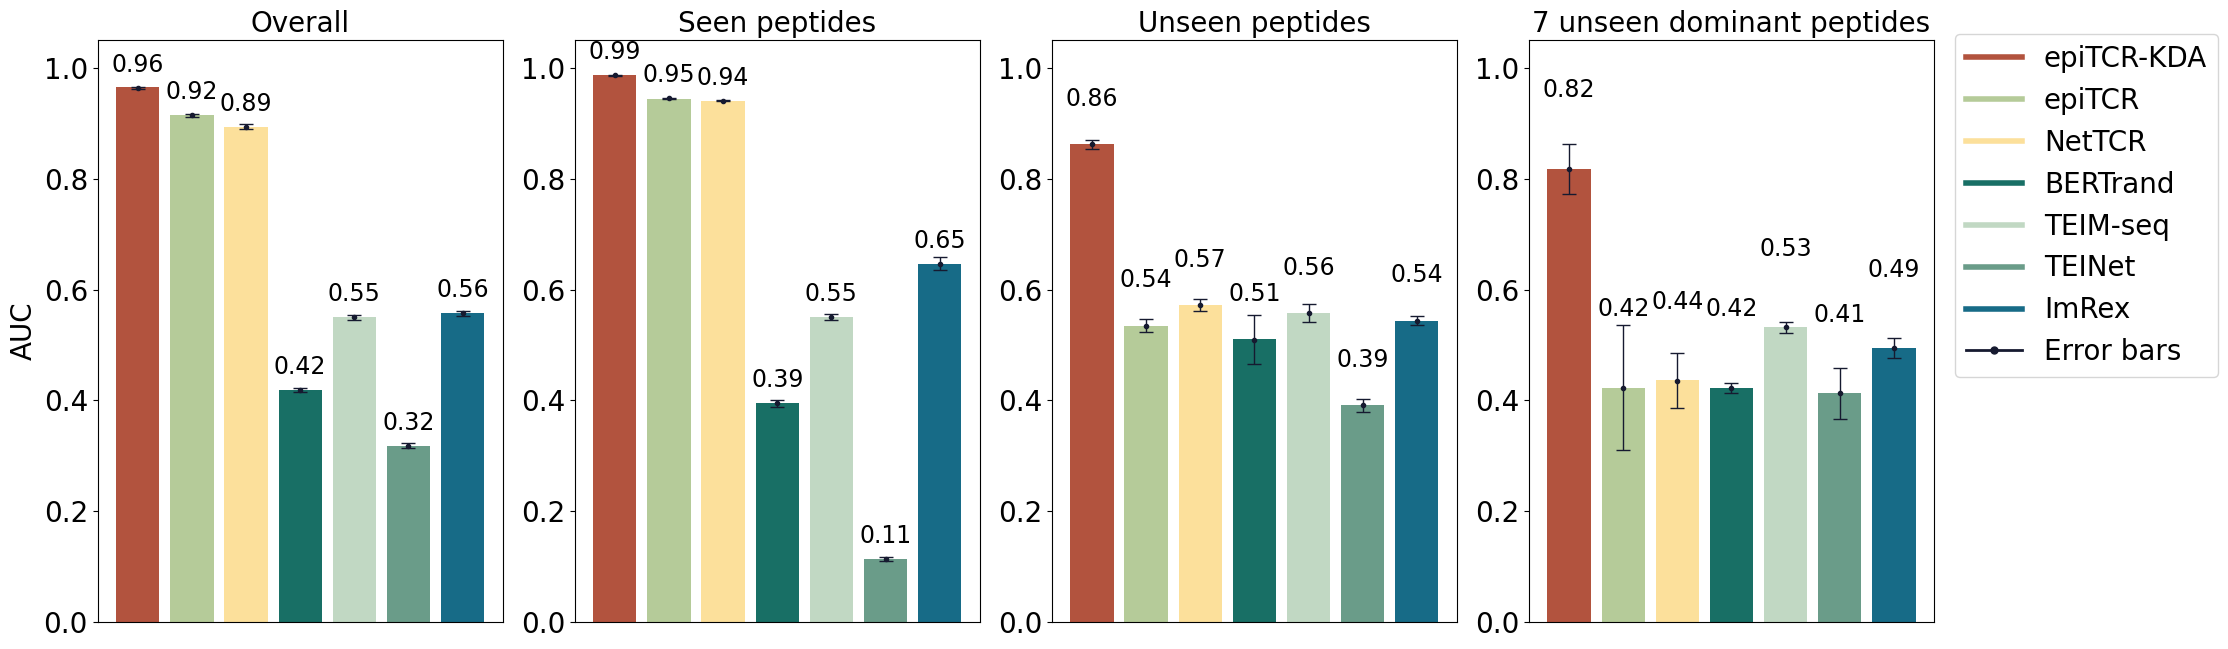

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

samples = ["Overall", "Seen peptides", "Unseen peptides", "7 unseen dominant peptides"]
columns = ['epiTCR-KDA', 'epiTCR', 'NetTCR', 'BERTrand', 'TEIM-seq', 'TEINet', 'ImRex']

values = {
    'Overall':                    [0.965, 0.915, 0.894, 0.419, 0.55 , 0.318, 0.557],
    'Seen peptides':              [0.987, 0.945, 0.941, 0.395, 0.551, 0.114, 0.647],
    'Unseen peptides':            [0.862, 0.535, 0.572, 0.51 , 0.558, 0.391, 0.544],
    '7 unseen dominant peptides': [0.818, 0.423, 0.436, 0.423, 0.532, 0.413, 0.494],
}

colors = {
    'epiTCR-KDA': '#B2533E',
    'epiTCR': '#B5CB99',
    'NetTCR': '#FCE09B',
    'BERTrand': '#186F65',
    'TEIM-seq': '#C1D8C3',
    'TEINet': '#6A9C89',
    'ImRex': '#176B87'
}

# Dữ liệu mới cho error bar1
new_values1 = [
    [0.964, 0.914, 0.891, 0.423, 0.552, 0.319, 0.560],
    [0.965, 0.915, 0.896, 0.414, 0.541, 0.313, 0.558],
    [0.963, 0.915, 0.898, 0.419, 0.556, 0.314, 0.552],
    [0.962, 0.916, 0.890, 0.417, 0.549, 0.322, 0.560],
    [0.967, 0.913, 0.888, 0.417, 0.545, 0.316, 0.550],
    [0.968, 0.921, 0.892, 0.424, 0.552, 0.318, 0.561],
    [0.966, 0.916, 0.896, 0.418, 0.555, 0.327, 0.559],
    [0.965, 0.912, 0.891, 0.413, 0.553, 0.321, 0.554],
    [0.962, 0.911, 0.900, 0.426, 0.543, 0.316, 0.555],
    [0.965, 0.918, 0.900, 0.421, 0.553, 0.318, 0.563],
]

# print(np.round(np.mean(new_values1, axis=0), 3))

# Dữ liệu mới cho error bar2
new_values2 = [
    [0.986, 0.944, 0.942, 0.395, 0.556, 0.110, 0.638],
    [0.987, 0.945, 0.941, 0.406, 0.547, 0.114, 0.633],
    [0.988, 0.944, 0.941, 0.392, 0.558, 0.115, 0.625],
    [0.988, 0.946, 0.940, 0.397, 0.557, 0.112, 0.669],
    [0.989, 0.945, 0.941, 0.388, 0.555, 0.116, 0.655],
    [0.985, 0.947, 0.941, 0.400, 0.542, 0.116, 0.644],
    [0.985, 0.947, 0.941, 0.401, 0.550, 0.112, 0.656],
    [0.985, 0.946, 0.941, 0.388, 0.542, 0.122, 0.655],
    [0.986, 0.944, 0.939, 0.391, 0.548, 0.106, 0.646],
    [0.988, 0.947, 0.942, 0.389, 0.554, 0.115, 0.646],
]

# print(np.round(np.mean(new_values2, axis=0), 3))


# Dữ liệu mới cho error bar3
new_values3 = [
    [0.862, 0.547, 0.557, 0.429, 0.555, 0.391, 0.553], 
    [0.852, 0.529, 0.573, 0.507, 0.554, 0.395, 0.545], 
    [0.868, 0.509, 0.580, 0.513, 0.569, 0.384, 0.548], 
    [0.866, 0.541, 0.557, 0.530, 0.548, 0.401, 0.526], 
    [0.861, 0.523, 0.569, 0.527, 0.563, 0.392, 0.550], 
    [0.852, 0.537, 0.570, 0.574, 0.533, 0.416, 0.543], 
    [0.868, 0.532, 0.584, 0.491, 0.597, 0.389, 0.538], 
    [0.852, 0.535, 0.590, 0.526, 0.562, 0.379, 0.544], 
    [0.869, 0.546, 0.580, 0.563, 0.539, 0.394, 0.540], 
    [0.875, 0.551, 0.560, 0.437, 0.561, 0.369, 0.552], 
]

# print(np.round(np.mean(new_values3, axis=0), 3))

# Dữ liệu mới cho error bar4
new_values4 = [
    [0.802, 0.383, 0.402, 0.414, 0.534, 0.430, 0.489],
    [0.801, 0.384, 0.408, 0.425, 0.522, 0.411, 0.493],
    [0.799, 0.387, 0.421, 0.410, 0.538, 0.428, 0.490],
    [0.951, 0.760, 0.582, 0.440, 0.556, 0.278, 0.547],
    [0.800, 0.390, 0.420, 0.417, 0.534, 0.440, 0.486],
    [0.806, 0.390, 0.429, 0.423, 0.529, 0.430, 0.484],
    [0.798, 0.383, 0.427, 0.426, 0.527, 0.436, 0.484],
    [0.803, 0.384, 0.414, 0.422, 0.519, 0.424, 0.491],
    [0.807, 0.383, 0.428, 0.412, 0.525, 0.420, 0.488],
    [0.811, 0.389, 0.425, 0.436, 0.533, 0.429, 0.492]
]

# Kích thước subplot
nplots = len(samples)

# Create a figure with subplots
fig, axs = plt.subplots(1, nplots, figsize=(20,7))
fig.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots

# Điều chỉnh độ rộng và khoảng cách giữa các cột
group_width = 0.8  # Điều chỉnh độ rộng của cột (smaller value for narrower bars)

# Vẽ từng subplot
for i, sample in enumerate(samples):
    ax = axs[i]

    # Vẽ cột và thêm giá trị
    left_pos = np.arange(len(columns))
    bars = ax.bar(left_pos, values[sample], group_width, color=[colors[column] for column in columns])

    # for bar, value in zip(bars, values[sample]):
    #     ax.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
    #                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

    # # Vẽ cột và thêm giá trị
    # left_pos = np.arange(len(columns))
    # bars = ax.bar(left_pos, values[sample], group_width, color=[colors[column] for column in columns])

    # Vẽ error bar chỉ cho subplot đầu tiên (index 0)
    if i == 0:
        ax.errorbar(left_pos, np.mean(new_values1, axis=0), yerr=np.std(new_values1, axis=0), fmt='.k',
                    color='#161A30', ecolor='#161A30', capsize=5, elinewidth=1, markeredgewidth=1)
        
        # Thêm văn bản trên cột
        for bar, value in zip(bars, np.mean(new_values1, axis=0)):
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=17)

    
    # Set giới hạn trục y từ 0 đến 1.2
    ax.set_ylim(0, 1.05)

    ax.set_title(sample, fontsize=20)
    ax.set_xticks([])
    
    # Vẽ error bar chỉ cho subplot đầu tiên (index 0)
    if i == 1:
        ax.errorbar(left_pos, np.mean(new_values2, axis=0), yerr=np.std(new_values2, axis=0), fmt='.k',
                    color='#161A30', ecolor='#161A30', capsize=5, elinewidth=1, markeredgewidth=1)
         # Thêm văn bản trên cột
        for bar, value in zip(bars, np.mean(new_values2, axis=0)):
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=17)
    
    # Set giới hạn trục y từ 0 đến 1.2
    ax.set_ylim(0, 1.05)

    ax.set_title(sample, fontsize=20)
    ax.set_xticks([])
    
    # Vẽ error bar chỉ cho subplot đầu tiên (index 0)
    if i == 2:
        ax.errorbar(left_pos, np.mean(new_values3, axis=0), yerr=np.std(new_values3, axis=0), fmt='.k',
                    color='#161A30', ecolor='#161A30', capsize=5, elinewidth=1, markeredgewidth=1)
        
         # Thêm văn bản trên cột
        for bar, value in zip(bars, np.mean(new_values3, axis=0)):
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.06, f'{value:.2f}', ha='center', va='bottom', fontsize=17)
    
    # Set giới hạn trục y từ 0 đến 1.2
    ax.set_ylim(0, 1.05)

    ax.set_title(sample, fontsize=20)
    ax.set_xticks([])
    
    # Vẽ error bar chỉ cho subplot đầu tiên (index 0)
    if i == 3:
        ax.errorbar(left_pos, np.mean(new_values4, axis=0), yerr=np.std(new_values4, axis=0), fmt='.k',
                    color='#161A30', ecolor='#161A30', capsize=5, elinewidth=1, markeredgewidth=1)
        
         # Thêm văn bản trên cột
        for bar, value in zip(bars, np.mean(new_values4, axis=0)):
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.12, f'{value:.2f}', ha='center', va='bottom', fontsize=17)
    
    # Set giới hạn trục y từ 0 đến 1.2
    ax.set_ylim(0, 1.05)
    # Set giới hạn trục y từ 0 đến 1.2

    # Set font size for y-axis tick labels
    ax.tick_params(axis='y', labelsize=20)


    ax.set_title(sample, fontsize=20)
    ax.set_xticks([])
    
    # ax.set_xticklabels([])  # Remove x-axis labels

    if i == 0:
        ax.set_ylabel('AUC', fontsize=20)
    else:
        ax.set_ylabel('')
        ax.set_xlabel('')

# Add a common y-axis label for the subplots
axs[0].set_ylabel('AUC', fontsize=20)

# Create a legend for the columns
column_legend_handles = [plt.Line2D([0], [0], color=colors[column], lw=4) for column in columns]
# fig.legend(column_legend_handles, columns, loc='upper right', bbox_to_anchor=(1.095, 0.89))

# Create a single legend combining both model and error bar legends
combined_legend_handles = column_legend_handles + [
    Line2D([0], [0], color='#161A30', lw=2, marker='o', markersize=5, label='Error bars')
]

fig.legend(combined_legend_handles, columns + ['Error bars'], loc='upper right', bbox_to_anchor=(1.12, 0.91), fontsize=20)
# 

# Set a common title for the entire figure
# fig.suptitle('AUC Values for Different Methods Across Test Sets', fontsize=16)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 0.98, 0.95])  # Prevent overlap with the suptitle

# Lưu hình ảnh
# plt.savefig("./plots/Total_AUC.png", bbox_inches='tight', dpi=300)
# Lưu hình ảnh với nền trong suốt
plt.savefig("./plots/Total_AUC.png", bbox_inches='tight', dpi=300)
plt.savefig("./plots/Total_AUC.pdf", bbox_inches='tight', dpi=300)

plt.show()

/tmp/ipykernel_138755/252623838.py:111: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(left_pos, np.mean(new_values1, axis=0), yerr=np.std(new_values1, axis=0), fmt='.k',
/tmp/ipykernel_138755/252623838.py:126: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(left_pos, np.mean(new_values2, axis=0), yerr=np.std(new_values2, axis=0), fmt='.k',
/tmp/ipykernel_138755/252623838.py:141: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(left_pos, np.mean(new_values3, axis=0), yerr=np.std(new_values3, axis=0), fmt='.k',
/tmp/ipykernel_138755/252623838.py:156: UserWarning: color is redundantly defined by the 'color' keyword argument a

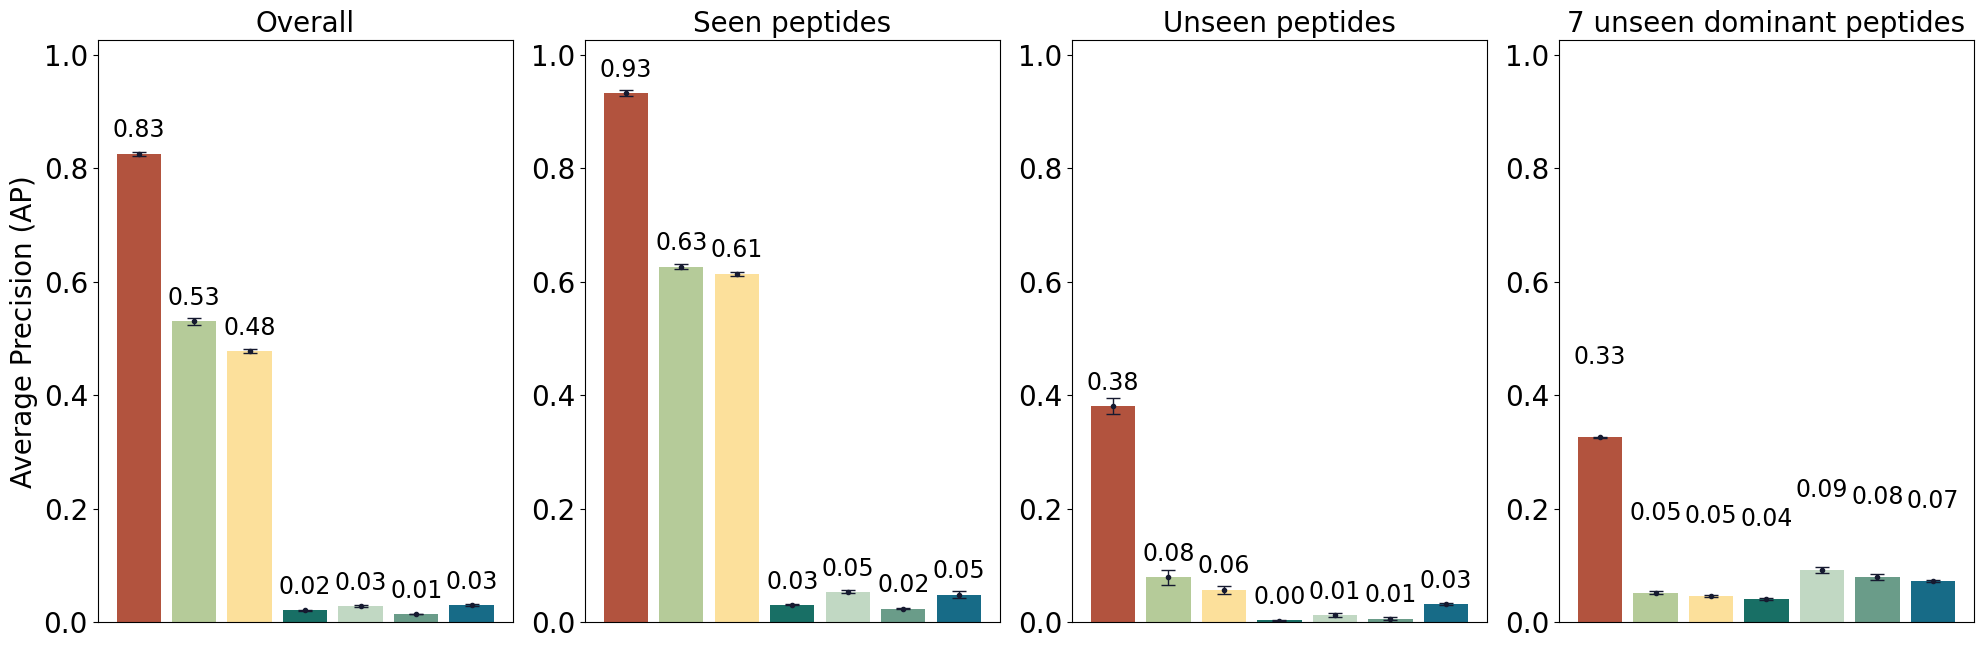

In [23]:
import numpy as np
import matplotlib.pyplot as plt

samples = ["Overall", "Seen peptides", "Unseen peptides", "7 unseen dominant peptides"]
columns = ['epiTCR-KDA', 'epiTCR', 'NetTCR', 'BERTrand', 'TEIM-seq', 'TEINet', 'ImRex']

values = {
    'Overall':                    [0.825, 0.53 , 0.478, 0.021, 0.028, 0.014, 0.03 ],
    'Seen peptides':              [0.932, 0.626, 0.614, 0.03 , 0.053, 0.023, 0.048],
    'Unseen peptides':            [0.38 , 0.079, 0.057, 0.003, 0.012, 0.006, 0.032],
    '7 unseen dominant peptides': [0.326, 0.051, 0.046, 0.041, 0.092, 0.079, 0.072],
}

colors = {
    'epiTCR-KDA': '#B2533E',
    'epiTCR': '#B5CB99',
    'NetTCR': '#FCE09B',
    'BERTrand': '#186F65',
    'TEIM-seq': '#C1D8C3',
    'TEINet': '#6A9C89',
    'ImRex': '#176B87'
}

# Dữ liệu mới cho error bar1
new_values1 = [
    [0.823, 0.533, 0.473, 0.021, 0.030, 0.014, 0.029],
    [0.830, 0.529, 0.482, 0.022, 0.028, 0.014, 0.031],
    [0.817, 0.525, 0.484, 0.021, 0.028, 0.014, 0.030],
    [0.825, 0.540, 0.474, 0.020, 0.029, 0.014, 0.030],
    [0.830, 0.526, 0.474, 0.023, 0.027, 0.014, 0.030],
    [0.823, 0.522, 0.482, 0.019, 0.028, 0.014, 0.028],
    [0.826, 0.522, 0.479, 0.021, 0.027, 0.014, 0.031],
    [0.827, 0.534, 0.474, 0.021, 0.027, 0.014, 0.029],
    [0.822, 0.538, 0.473, 0.019, 0.030, 0.014, 0.030],
    [0.829, 0.529, 0.481, 0.020, 0.029, 0.015, 0.032],
]

# print(np.round(np.mean(new_values1, axis=0), 3))

# Dữ liệu mới cho error bar2
new_values2 = [
    [0.934, 0.629, 0.613, 0.030, 0.052, 0.023, 0.052],
    [0.926, 0.623, 0.613, 0.031, 0.052, 0.025, 0.052],
    [0.925, 0.621, 0.607, 0.029, 0.050, 0.023, 0.043],
    [0.928, 0.623, 0.615, 0.030, 0.055, 0.023, 0.041],
    [0.938, 0.629, 0.618, 0.032, 0.054, 0.023, 0.051],
    [0.927, 0.632, 0.615, 0.029, 0.051, 0.024, 0.060],
    [0.931, 0.630, 0.608, 0.029, 0.055, 0.023, 0.042],
    [0.932, 0.628, 0.617, 0.030, 0.056, 0.023, 0.050],
    [0.940, 0.620, 0.617, 0.030, 0.057, 0.023, 0.050],
    [0.936, 0.628, 0.613, 0.030, 0.049, 0.023, 0.039],
]

# print(np.round(np.mean(new_values2, axis=0), 3))


# Dữ liệu mới cho error bar3
new_values3 = [
    [0.391, 0.076, 0.060, 0.003, 0.010, 0.005, 0.031],
    [0.399, 0.085, 0.057, 0.004, 0.007, 0.004, 0.031],
    [0.373, 0.066, 0.051, 0.002, 0.014, 0.008, 0.030],
    [0.368, 0.071, 0.061, 0.005, 0.011, 0.005, 0.031],
    [0.408, 0.060, 0.067, 0.001, 0.014, 0.010, 0.032],
    [0.373, 0.074, 0.051, 0.001, 0.019, 0.010, 0.034],
    [0.376, 0.070, 0.064, 0.003, 0.016, 0.004, 0.033],
    [0.373, 0.085, 0.056, 0.004, 0.008, 0.005, 0.031],
    [0.385, 0.107, 0.042, 0.001, 0.008, 0.004, 0.031],
    [0.358, 0.094, 0.061, 0.001, 0.014, 0.006, 0.031],
]

# print(np.round(np.mean(new_values3, axis=0), 3))

# Dữ liệu mới cho error bar4
new_values4 = [
    [0.324, 0.05, 0.047, 0.04, 0.092, 0.08, 0.074],
    [0.326, 0.051, 0.048, 0.038, 0.096, 0.075, 0.069],
    [0.325, 0.057, 0.049, 0.041, 0.084, 0.077, 0.07],
    [0.326, 0.051, 0.046, 0.039, 0.1, 0.068, 0.075],
    [0.325, 0.053, 0.045, 0.044, 0.086, 0.078, 0.073],
    [0.325, 0.053, 0.045, 0.044, 0.086, 0.078, 0.073],
    [0.326, 0.049, 0.043, 0.041, 0.092, 0.079, 0.067],
    [0.327, 0.052, 0.046, 0.04, 0.094, 0.088, 0.074],
    [0.327, 0.049, 0.048, 0.04, 0.097, 0.086, 0.074],
    [0.327, 0.049, 0.045, 0.043, 0.096, 0.077, 0.073]
]

# Kích thước subplot
nplots = len(samples)

# Create a figure with subplots
fig, axs = plt.subplots(1, nplots, figsize=(20,7))
fig.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots

# Điều chỉnh độ rộng và khoảng cách giữa các cột
group_width = 0.8  # Điều chỉnh độ rộng của cột (smaller value for narrower bars)

# Vẽ từng subplot
for i, sample in enumerate(samples):
    ax = axs[i]

    # Vẽ cột và thêm giá trị
    left_pos = np.arange(len(columns))
    bars = ax.bar(left_pos, values[sample], group_width, color=[colors[column] for column in columns])

    # for bar, value in zip(bars, values[sample]):
    #     ax.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
    #                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

    # Vẽ error bar chỉ cho subplot đầu tiên (index 0)
    if i == 0:
        ax.errorbar(left_pos, np.mean(new_values1, axis=0), yerr=np.std(new_values1, axis=0), fmt='.k',
                    color='#161A30', ecolor='#161A30', capsize=5, elinewidth=1, markeredgewidth=1)
        
        # Thêm văn bản trên cột
        for bar, value in zip(bars, np.mean(new_values1, axis=0)):
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=17)
    
    # Set giới hạn trục y từ 0 đến 1.2
    ax.set_ylim(0, 1.025)

    ax.set_title(sample, fontsize=20)
    ax.set_xticks([])
    
    # Vẽ error bar chỉ cho subplot đầu tiên (index 0)
    if i == 1:
        ax.errorbar(left_pos, np.mean(new_values2, axis=0), yerr=np.std(new_values2, axis=0), fmt='.k',
                    color='#161A30', ecolor='#161A30', capsize=5, elinewidth=1, markeredgewidth=1)
        
        # Thêm văn bản trên cột
        for bar, value in zip(bars, np.mean(new_values2, axis=0)):
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=17)
    
    # Set giới hạn trục y từ 0 đến 1.2
    ax.set_ylim(0, 1.025)

    ax.set_title(sample, fontsize=20)
    ax.set_xticks([])
    
    # Vẽ error bar chỉ cho subplot đầu tiên (index 0)
    if i == 2:
        ax.errorbar(left_pos, np.mean(new_values3, axis=0), yerr=np.std(new_values3, axis=0), fmt='.k',
                    color='#161A30', ecolor='#161A30', capsize=5, elinewidth=1, markeredgewidth=1)
        
        # Thêm văn bản trên cột
        for bar, value in zip(bars, np.mean(new_values3, axis=0)):
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=17)
    
    # Set giới hạn trục y từ 0 đến 1.2
    ax.set_ylim(0, 1.025)

    ax.set_title(sample, fontsize=20)
    ax.set_xticks([])
    
    # Vẽ error bar chỉ cho subplot đầu tiên (index 0)
    if i == 3:
        ax.errorbar(left_pos, np.mean(new_values4, axis=0), yerr=np.std(new_values4, axis=0), fmt='.k',
                    color='#161A30', ecolor='#161A30', capsize=5, elinewidth=1, markeredgewidth=1)
        
        # Thêm văn bản trên cột
        for bar, value in zip(bars, np.mean(new_values4, axis=0)):
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.12, f'{value:.2f}', ha='center', va='bottom', fontsize=17)
    
    # Set giới hạn trục y từ 0 đến 1.2
    ax.set_ylim(0, 1.025)
    ax.tick_params(axis='y', labelsize=20)

    ax.set_title(sample, fontsize=20)
    ax.set_xticks([])
    
    # ax.set_xticklabels([])  # Remove x-axis labels

    if i == 0:
        ax.set_ylabel('Average Precision (AP)', fontsize=20)
    else:
        ax.set_ylabel('')
        ax.set_xlabel('')

# Add a common y-axis label for the subplots
axs[0].set_ylabel('Average Precision (AP)', fontsize=20)

# Create a legend for the columns
column_legend_handles = [plt.Line2D([0], [0], color=colors[column], lw=4) for column in columns]
# fig.legend(column_legend_handles, columns, loc='upper right', bbox_to_anchor=(1.095, 0.89))

# Set a common title for the entire figure
# fig.suptitle('AUC Values for Different Methods Across Test Sets', fontsize=16)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent overlap with the suptitle

# Lưu hình ảnh
plt.savefig("./plots/Total_mAP.png", bbox_inches='tight', dpi=300)
# plt.savefig("./plots/sampling4_error_bar_only_first_subplot2.pdf", bbox_inches='tight', dpi=300)

plt.show()
